In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [136]:
plt.rcParams["figure.figsize"] = (14,6)

In [137]:
confirmed = pd.read_csv("../data/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
deaths = pd.read_csv("../data/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")
recovered = pd.read_csv("../data/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv")

In [138]:
confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,15205,15750,16509,17267,18054,18969,19551,20342,20917,21459
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,1137,1143,1164,1184,1197,1212,1232,1246,1263,1299
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,9394,9513,9626,9733,9831,9935,10050,10154,10265,10382
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,764,765,844,851,852,852,852,852,852,852
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,86,86,86,86,86,86,88,91,92,96


In [139]:
confirmed.rename(columns={"Country/Region":"Country", "Province/State":"Province"}, inplace=True)
recovered.rename(columns={"Country/Region":"Country", "Province/State":"Province"}, inplace=True)
deaths.rename(columns={"Country/Region":"Country", "Province/State":"Province"}, inplace=True)

In [140]:
confirmed = confirmed.drop(columns=["Lat", "Long"]).set_index(["Country", "Province"]).T
recovered = recovered.drop(columns=["Lat", "Long"]).set_index(["Country", "Province"]).T
deaths = deaths.drop(columns=["Lat", "Long"]).set_index(["Country", "Province"]).T

In [141]:
infected = confirmed - recovered - deaths

In [142]:
data = pd.concat([infected, recovered, deaths, confirmed], axis=1, keys=["I", "R", "D", "C"]).swaplevel(0, 2, axis=1).swaplevel(0,1,axis=1).sort_index(axis=1)
data

Country  Afghanistan                   Albania               Algeria       \
Province         NaN                       NaN                   NaN        
                   C    D      I     R       C   D    I    R       C    D   
1/22/20            0    0      0     0       0   0    0    0       0    0   
1/23/20            0    0      0     0       0   0    0    0       0    0   
1/24/20            0    0      0     0       0   0    0    0       0    0   
1/25/20            0    0      0     0       0   0    0    0       0    0   
1/26/20            0    0      0     0       0   0    0    0       0    0   
...              ...  ...    ...   ...     ...  ..  ...  ...     ...  ...   
6/5/20         18969  309  16898  1762    1212  33  269  910    9935  690   
6/6/20         19551  327  17394  1830    1232  34  273  925   10050  698   
6/7/20         20342  357  18110  1875    1246  34  274  938   10154  707   
6/8/20         20917  369  18377  2171    1263  34  284  945   10265  715   
6/9/20         21459  384  18424  2651    1299  34  305  960   10382  724   

Country   ... Yemen     Zambia               Zimbabwe              
Province  ...   NaN        NaN                    NaN              
          ...     I   R      C   D    I    R        C  D    I   R  
1/22/20   ...     0   0      0   0    0    0        0  0    0   0  
1/23/20   ...     0   0      0   0    0    0        0  0    0   0  
1/24/20   ...     0   0      0   0    0    0        0  0    0   0  
1/25/20   ...     0   0      0   0    0    0        0  0    0   0  
1/26/20   ...     0   0      0   0    0    0        0  0    0   0  
...       ...   ...  ..    ...  ..  ...  ...      ... ..  ...  ..  
6/5/20    ...   335  23   1089   7  170  912      265  4  228  33  
6/6/20    ...   348  23   1089   7  170  912      279  4  242  33  
6/7/20    ...   349  23   1089   7  170  912      282  4  244  34  
6/8/20    ...   361  23   1200  10  278  912      287  4  237  46  
6/9/20    ...   374  23   1200  10  278  912      314  4  264  46  

[140 rows x 1052 columns]

In [143]:
data.index = pd.to_datetime(data.index)
data.index.name = "date"

In [144]:
data.isna().sum().sum()

2100

In [145]:
ds = data.isna().sum()
ds[ds != 0]

Country  Province                    
Canada   Alberta                    I    140
         British Columbia           I    140
         Diamond Princess           I    140
         Grand Princess             I    140
         Manitoba                   I    140
         New Brunswick              I    140
         Newfoundland and Labrador  I    140
         Northwest Territories      I    140
         Nova Scotia                I    140
         Ontario                    I    140
         Prince Edward Island       I    140
         Quebec                     I    140
         Saskatchewan               I    140
         Yukon                      I    140
         NaN                        I    140
dtype: int64

In [146]:
data.loc[:, "Canada"]

Province   Alberta          British Columbia          Diamond Princess         \
                 C    D   I                C    D   I                C  D   I   
date                                                                            
2020-01-22       0    0 NaN                0    0 NaN                0  0 NaN   
2020-01-23       0    0 NaN                0    0 NaN                0  0 NaN   
2020-01-24       0    0 NaN                0    0 NaN                0  0 NaN   
2020-01-25       0    0 NaN                0    0 NaN                0  0 NaN   
2020-01-26       0    0 NaN                0    0 NaN                0  0 NaN   
...            ...  ...  ..              ...  ...  ..              ... ..  ..   
2020-06-05    7098  146 NaN             2632  167 NaN                0  1 NaN   
2020-06-06    7138  146 NaN             2632  167 NaN                0  1 NaN   
2020-06-07    7138  146 NaN             2632  167 NaN                0  1 NaN   
2020-06-08    7202  149 NaN             2659  167 NaN                0  1 NaN   
2020-06-09    7229  151 NaN             2669  167 NaN                0  1 NaN   

Province   Grand Princess  ... Quebec     Saskatchewan         Yukon         \
                        C  ...      D   I            C   D   I     C  D   I   
date                       ...                                                
2020-01-22              0  ...      0 NaN            0   0 NaN     0  0 NaN   
2020-01-23              0  ...      0 NaN            0   0 NaN     0  0 NaN   
2020-01-24              0  ...      0 NaN            0   0 NaN     0  0 NaN   
2020-01-25              0  ...      0 NaN            0   0 NaN     0  0 NaN   
2020-01-26              0  ...      0 NaN            0   0 NaN     0  0 NaN   
...                   ...  ...    ...  ..          ...  ..  ..   ... ..  ..   
2020-06-05             13  ...   4935 NaN          649  11 NaN    11  0 NaN   
2020-06-06             13  ...   4970 NaN          650  11 NaN    11  0 NaN   
2020-06-07             13  ...   4978 NaN          650  11 NaN    11  0 NaN   
2020-06-08             13  ...   4984 NaN          654  13 NaN    11  0 NaN   
2020-06-09             13  ...   5029 NaN          656  13 NaN    11  0 NaN   

Province   NaN         
             I      R  
date                   
2020-01-22 NaN      0  
2020-01-23 NaN      0  
2020-01-24 NaN      0  
2020-01-25 NaN      0  
2020-01-26 NaN      0  
...         ..    ...  
2020-06-05 NaN  53074  
2020-06-06 NaN  54087  
2020-06-07 NaN  54675  
2020-06-08 NaN  55343  
2020-06-09 NaN  56117  

[140 rows x 44 columns]

In [147]:
data = data.drop(columns=["Canada"], level=0)

In [148]:
data.isna().sum().sum()

0

In [149]:
data = data.rolling(window=7).mean().dropna().astype("int64")
data

Country    Afghanistan                   Albania               Algeria       \
Province           NaN                       NaN                   NaN        
                     C    D      I     R       C   D    I    R       C    D   
date                                                                          
2020-01-28           0    0      0     0       0   0    0    0       0    0   
2020-01-29           0    0      0     0       0   0    0    0       0    0   
2020-01-30           0    0      0     0       0   0    0    0       0    0   
2020-01-31           0    0      0     0       0   0    0    0       0    0   
2020-02-01           0    0      0     0       0   0    0    0       0    0   
...                ...  ...    ...   ...     ...  ..  ...  ...     ...  ...   
2020-06-05       16611  277  14851  1482    1165  33  246  886    9614  667   
2020-06-06       17329  288  15482  1557    1181  33  252  895    9726  674   
2020-06-07       18063  303  16124  1636    1196  33  258  905    9834  682   
2020-06-08       18801  318  16741  1742    1214  33  265  915    9942  690   
2020-06-09       19508  334  17260  1913    1233  33  274  924   10050  698   

Country     ... Yemen     Zambia              Zimbabwe              
Province    ...   NaN        NaN                   NaN              
            ...     I   R      C  D    I    R        C  D    I   R  
date        ...                                                     
2020-01-28  ...     0   0      0  0    0    0        0  0    0   0  
2020-01-29  ...     0   0      0  0    0    0        0  0    0   0  
2020-01-30  ...     0   0      0  0    0    0        0  0    0   0  
2020-01-31  ...     0   0      0  0    0    0        0  0    0   0  
2020-02-01  ...     0   0      0  0    0    0        0  0    0   0  
...         ...   ...  ..    ... ..  ...  ...      ... ..  ...  ..  
2020-06-05  ...   282  16   1079  7  198  874      212  4  178  29  
2020-06-06  ...   300  17   1084  7  184  893      227  4  192  30  
2020-06-07  ...   317  18   1089  7  170  912      242  4  206  31  
2020-06-08  ...   332  20   1104  7  185  912      254  4  216  33  
2020-06-09  ...   343  21   1120  7  200  912      269  4  229  36  

[134 rows x 1008 columns]

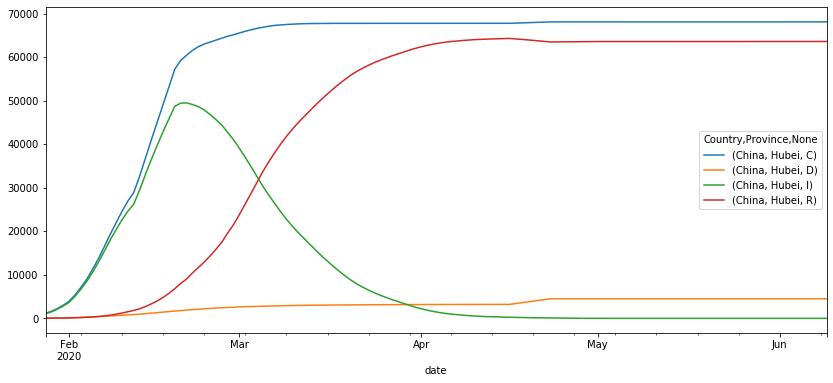

In [150]:
data.loc[:, pd.IndexSlice["China", "Hubei", :]].plot()

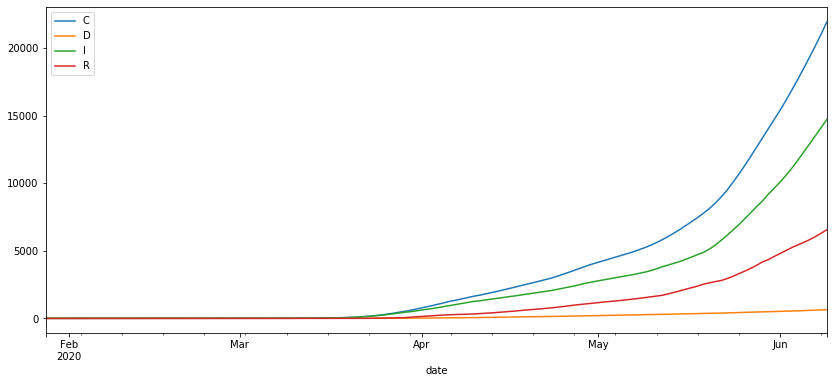

In [151]:
data.Argentina.droplevel(0, axis=1).plot()

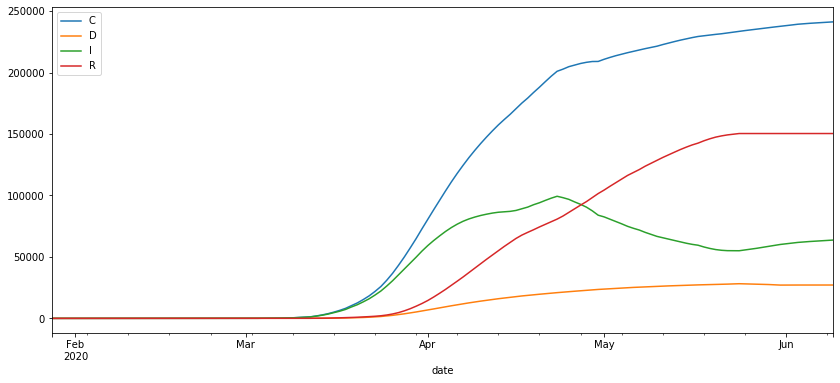

In [152]:
data.Spain.droplevel(0, axis=1).plot()

In [153]:
data_no_provinces = data.sum(axis=1, level=[0,2])
data_no_provinces.head()

Country    Afghanistan          Albania          Algeria     ... Yemen     \
                     C  D  I  R       C  D  I  R       C  D  ...     I  R   
date                                                         ...            
2020-01-28           0  0  0  0       0  0  0  0       0  0  ...     0  0   
2020-01-29           0  0  0  0       0  0  0  0       0  0  ...     0  0   
2020-01-30           0  0  0  0       0  0  0  0       0  0  ...     0  0   
2020-01-31           0  0  0  0       0  0  0  0       0  0  ...     0  0   
2020-02-01           0  0  0  0       0  0  0  0       0  0  ...     0  0   

Country    Zambia          Zimbabwe           
                C  D  I  R        C  D  I  R  
date                                          
2020-01-28      0  0  0  0        0  0  0  0  
2020-01-29      0  0  0  0        0  0  0  0  
2020-01-30      0  0  0  0        0  0  0  0  
2020-01-31      0  0  0  0        0  0  0  0  
2020-02-01      0  0  0  0        0  0  0  0  

[5 rows x 748 columns]

In [154]:
path = "../data/ts-covid.hdf"
if os.path.exists(path):
    os.remove(path)
    
for country in data_no_provinces.columns.get_level_values(0).unique():
    data_no_provinces[country].to_hdf("../data/ts-covid.hdf", key=country)

C:\Users\ariel\Anaconda3\envs\ml\lib\site-packages\tables\path.py:155: NaturalNameWarning: object name is not a valid Python identifier: 'Antigua and Barbuda'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
C:\Users\ariel\Anaconda3\envs\ml\lib\site-packages\tables\path.py:155: NaturalNameWarning: object name is not a valid Python identifier: 'Bosnia and Herzegovina'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
C:\Users\ariel\Anaconda3\envs\ml\lib\site-packages\tables\path.py:155: NaturalNameWarning: object name is not a valid Python identifier: 'Burkina Faso'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; 

C:\Users\ariel\Anaconda3\envs\ml\lib\site-packages\tables\path.py:155: NaturalNameWarning: object name is not a valid Python identifier: 'South Africa'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
C:\Users\ariel\Anaconda3\envs\ml\lib\site-packages\tables\path.py:155: NaturalNameWarning: object name is not a valid Python identifier: 'South Sudan'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
C:\Users\ariel\Anaconda3\envs\ml\lib\site-packages\tables\path.py:155: NaturalNameWarning: object name is not a valid Python identifier: 'Sri Lanka'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` w

In [155]:
data_provinces = data.loc[:, pd.IndexSlice[:, data.columns.get_level_values(1).notna(), :]]

In [156]:
data_provinces.columns.get_level_values(0).unique()

Index(['Australia', 'China', 'Denmark', 'France', 'Netherlands',
       'United Kingdom'],
      dtype='object', name='Country')

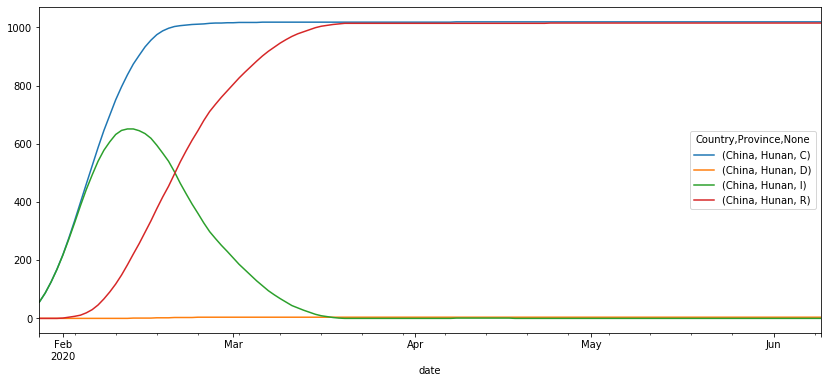

In [157]:
data_provinces.loc[:, pd.IndexSlice["China", "Hunan", :]].plot()

In [158]:
path = "../data/ts-covid-provinces.hdf"
if os.path.exists(path):
    os.remove(path)

for country in data_provinces.columns.get_level_values(0).unique():
    data_provinces[country].to_hdf("../data/ts-covid-provinces.hdf", key=country)

C:\Users\ariel\Anaconda3\envs\ml\lib\site-packages\tables\path.py:155: NaturalNameWarning: object name is not a valid Python identifier: 'United Kingdom'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


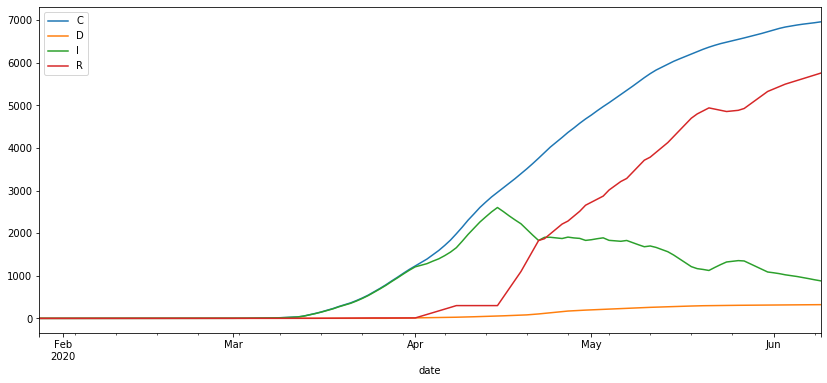

In [168]:
prueba = pd.read_hdf("../data/ts-covid.hdf", key="Finland")
prueba.plot()